# FIT5149 S2 2020 
# Assessment 1: Predict Bike-Sharing need in Metropolitan Area


Student information
- Family Name: Aniruddha
- Given Name: Gayatri 
- Student ID: 30945305
- Student email: gani0001@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
* ggplot2
* corrplot
* car
* reshape2
* e1071
* stats
* scales
* grid
* gridExtra
* glmnet
* lattice
* repr
* lubridate

## Table of Contents

1. [Introduction](#sec_1)
2. [Data Exploration](#sec_2)
* [Exploratory Data Analysis](#sec_3)
* [Methodology](#sec_4)
* [Model Development](#sec_5)
* [Results and discussion](#sec_6)
* [Conclusion](#sec_7)
* [References](#sec_8)

## 1. Introduction <a class="anchor" id="sec_1"></a>

* This assignment revolves around predicting the hourly rental bike demands.
* The demands for bikes is based on data such as - weather, season, holiday etc.
* We have been provided with two datasets - the **training set and the testing set.**
* This dataset contains :
    * Information about the weather
    * Date Information
    * Number of bikes rented per hour
* There are around **8000 instances and 14 attributes.**
* Our **target is the "Rented Bike Count"** - the one that we are required to make our prediction on. 
* We are doing this so that the correct number of bikes are available at the right place and at the right time!
* This is to address the following issues :
    * Allows more people to use a bike from one location and drop it at a different location. 
    * Bike sharing is generally free of cost or at reasonable rates.
    * Managing the never-ending traffic problem in metros.
    * Making the city more eco-friendly and sustainable!
* We have performed the **following tasks** in this assignment in order to perform the prediction and inference task :
    * Basic Data Exploration
    * In-depth Exploratory Data Analysis : Identifying common patterns and trends.
    * Overview of the methodology followed to train the dataset.
    * Development of the models.
    * Comparison and justification of the choice of models.
    * Analysis, interpretation of the results and conclusion.

**Following are the libraries used in the notebook:**

In [1]:
# To create complex plots 
library(ggplot2)
# To plot the correlation matrix
library(corrplot)
# To create linear regression models 
library(car)
# To use the Melt function 
library(reshape2)
# For the SVM model
library(e1071)
# For the statistical functions 
library(stats)
# For providing interal scaling infrastructure to ggplot2
library(scales)
# In order to produce a graphical output directly 
library(grid)
# In order to perform a number of user-level functions 
library(gridExtra)
#library(RColorBrewer)
# To create linear regression
library(glmnet)
# To produce multiple small plots 
library(lattice)
# For string and byte representations
library(repr)
# For dealing with dates 
library(lubridate)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Warning message:
"package 'e1071' was built under R version 3.6.3"
Warning message:
"package 'scales' was built under R version 3.6.3"
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Loading required package: Matrix

Loading required package: foreach

Loaded glmnet 2.0-16


Warning message:
"package 'repr' was built under R version 3.6.3"
Warning message:
"package 'lubridate' was built under R version 3.6.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




## 2. Data Exploration<a class="anchor" id="sec_2"></a>

* This section contains a descriptive and comprehensive data exploration.
* I have provided in depth analysis with related plots and statistical methods.
* The plots and methods have been justified with proper explanations as well.

* The following are the steps performed in order to explore the data : 
    * We load and read the training and testing dataset.
    * We then get a general overview of the training dataset.
    * This involves:
        * Number of records and attributes.
        * Inspecting the first few and the last few elements.
        * Understanding the general structure of the dataset.       

In [2]:
# Loading the training dataset
bike_data <- read.csv("train.csv")

# Loading the testing dataset
bike_data_test <- read.csv("test.csv")

**Exploring the training dataset : bike_data**

In [3]:
# Displaying the dimensions, records and attributes (rows and columns)
cat(" \n Number of records of the dataset:", dim(bike_data)[1])
cat(" \n Number of attributes of the dataset:", dim(bike_data)[2])

 
 Number of records of the dataset: 7008 
 Number of attributes of the dataset: 14

In [4]:
# Displaying the structure
cat(" \n The structure of the bike dataset is as follows :\n\n")
str(bike_data)

 
 The structure of the bike dataset is as follows :

'data.frame':	7008 obs. of  14 variables:
 $ Date                 : Factor w/ 365 levels "1/1/18","1/10/18",..: 54 78 255 300 77 151 105 353 210 10 ...
 $ Rented.Bike.Count    : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour                 : int  14 14 5 9 17 10 8 1 20 18 ...
 $ Temperature          : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity             : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed           : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility           : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ Dew.point.temperature: num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ Solar.Radiation      : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...


**summary()**:
* This displays the distribution of every variable.
* It returns the following for every variable :
    * Minimum Value
    * Maximum Value
    * Mean
    * Median
    * 1st and 3rd Quartile 

In [5]:
# Displaying the descriptive statistics of the variables
summary(bike_data)

       Date      Rented.Bike.Count      Hour        Temperature    
 30/7/18 :  24   Min.   :   0.0    Min.   : 0.00   Min.   :-17.50  
 10/11/18:  23   1st Qu.: 188.0    1st Qu.: 5.75   1st Qu.:  3.40  
 18/11/18:  23   Median : 503.0    Median :11.00   Median : 13.60  
 19/8/18 :  23   Mean   : 703.2    Mean   :11.46   Mean   : 12.83  
 20/1/18 :  23   3rd Qu.:1063.0    3rd Qu.:17.00   3rd Qu.: 22.50  
 21/4/18 :  23   Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
 (Other) :6869                                                     
    Humidity       Wind.speed     Visibility     Dew.point.temperature
 Min.   : 0.00   Min.   :0.00   Min.   :  27.0   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.90   1st Qu.: 944.8   1st Qu.: -4.700      
 Median :57.00   Median :1.50   Median :1693.0   Median :  5.000      
 Mean   :58.25   Mean   :1.72   Mean   :1436.0   Mean   :  4.029      
 3rd Qu.:74.00   3rd Qu.:2.30   3rd Qu.:2000.0   3rd Qu.: 14.800      
 Max.   :98.00   Max.   :7.40 

**IMPORTANT FINDINGS:**
* Looking at our target variable - **Rented.Bike.Count** :
    * We can see that on an average there are around 700 bikes rented every hour.
    * The maximum number of bikes that have been rented are around 3500 bikes every hour. 
    
* Rainfall and Snowfall have the following values as 0:
    * Minimum value
    * Median
    * 1st Quartile
    
* The following variables have their minimum values as 0:
    * Rented.Bike.Count
    * Hour
    * Humidity
    * Wind.speed

In [6]:
cat("\n First few records of the dataset are:")
# Inspect the first few records
head(bike_data)


 First few records of the dataset are:

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2,15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
3,29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4,4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
5,15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
6,20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


In [7]:
# And the last few
cat("\n Last few records of the dataset are:")
tail(bike_data)


 Last few records of the dataset are:

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
7003,27/1/18,189,13,-6.6,27,2.1,1889,-22.5,1.24,0,0.3,Winter,No Holiday,Yes
7004,21/9/18,127,8,17.8,97,2.0,1284,17.3,0.09,4,0.0,Autumn,No Holiday,Yes
7005,11/2/18,58,3,-7.2,43,2.0,2000,-17.6,0.00,0,0.0,Winter,No Holiday,Yes
7006,30/3/18,115,4,9.9,67,1.1,820,4.0,0.00,0,0.0,Spring,No Holiday,Yes
7007,29/11/18,800,7,0.8,41,0.6,1298,-10.9,0.00,0,0.0,Autumn,No Holiday,Yes
7008,14/2/18,349,13,7.2,65,3.8,773,1.0,0.61,0,0.0,Winter,No Holiday,Yes


**Analysis of Important Findings:**
* We have the following variables : 
    * Rented.Bike.Count
    * Hour
    * Temperature
    * Humidity
    * Wind.speed
    * Visibility
    * Dew.point.temperature
    * Solar.Radiation
    * Rainfall
    * Snowfall
    * Seasons
    * Holiday
    * Functioning.Day
    * Date
* Clearly, **QUANTITATIVE VARIABLES** are :
    * Hour
    * Temperature
    * Humidity
    * Wind.speed
    * Visibility
    * Dew.point.temperature
    * Solar.Radiation
    * Rainfall
    * Snowfall
* Clearly, **QUANLITATIVE VARIABLES** are :
    * Seasons
    * Holiday
    * Functioning.Day

In [8]:
# Checking for duplicate dates 
duplicates <- aggregate(bike_data$Date, list(bike_data$Date), NROW)
duplicates <- bike_data[bike_data$Date %in% duplicates[duplicates$x > 1,"Group.1"],]
head(duplicates[order(duplicates$Date, duplicates$Hour),],20)

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
3375,1/1/18,206,0,-3.2,40,0.5,1358,-14.9,0.00,0,0,Winter,Holiday,Yes
1711,1/1/18,178,2,-3.7,42,0.9,2000,-14.7,0.00,0,0,Winter,Holiday,Yes
1924,1/1/18,119,3,-4.0,44,1.0,2000,-14.4,0.00,0,0,Winter,Holiday,Yes
3930,1/1/18,61,5,-4.4,54,0.8,1786,-12.3,0.00,0,0,Winter,Holiday,Yes
5783,1/1/18,65,6,-4.5,51,1.1,2000,-13.1,0.00,0,0,Winter,Holiday,Yes
4478,1/1/18,81,7,-4.7,56,1.1,2000,-12.1,0.00,0,0,Winter,Holiday,Yes
5200,1/1/18,89,8,-5.0,55,1.0,2000,-12.6,0.00,0,0,Winter,Holiday,Yes
783,1/1/18,121,9,-4.3,39,0.7,1973,-16.2,0.15,0,0,Winter,Holiday,Yes
48,1/1/18,139,10,-1.6,32,0.8,1766,-16.1,0.53,0,0,Winter,Holiday,Yes


**Analysis:**
* Clearly, there is no duplicate data in our dataset.

## 3. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

### Overview of the Training Dataset

### Investigate Distribution of Each Variable : Single Variable Distribution

#### Plot 1 : Variable distributions using boxplots

* Boxplots are graphical representations of single, numeric data.
* Here, the numerical data is represented through it's quartiles.

In [9]:
attach(bike_data)

Using Date, Seasons, Holiday, Functioning.Day as id variables



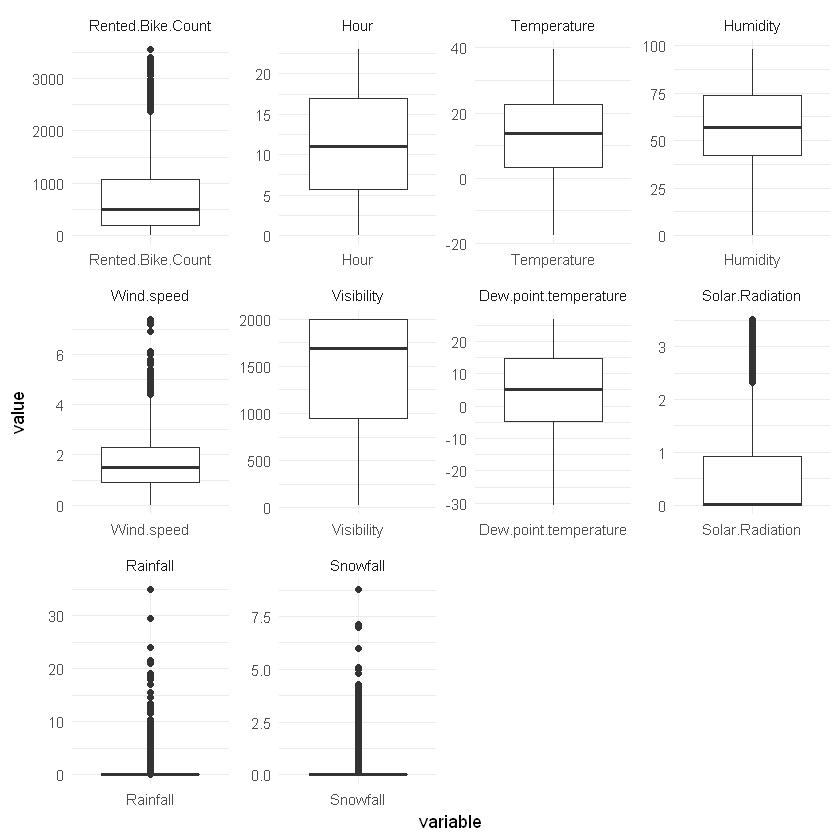

In [10]:
# Generating the box plots of each variable
m1 <- melt(as.data.frame(bike_data))

# Plotting the boxplot
ggplot(m1, aes(x = variable, y = value)) +
facet_wrap(~variable, scales = "free") +
geom_boxplot() +
theme_minimal() +
scale_y_continuous(labels = function (n) {format(n, scientific = FALSE)})

**Analysis of IMPORTANT FINDINGS:**
* We can clearly see that there are some outliers present in the following variables:
    * Rented.Bike.Count
    * Wind.Speed
    * Solar Radiation
    * Rainfall
    * Snowfall

#### Plot 2 : Variable distributions using Histograms

* Histograms are made by binning the data and then counting the number of observations in each bin.
* They help in visualising the shape of the distribution.


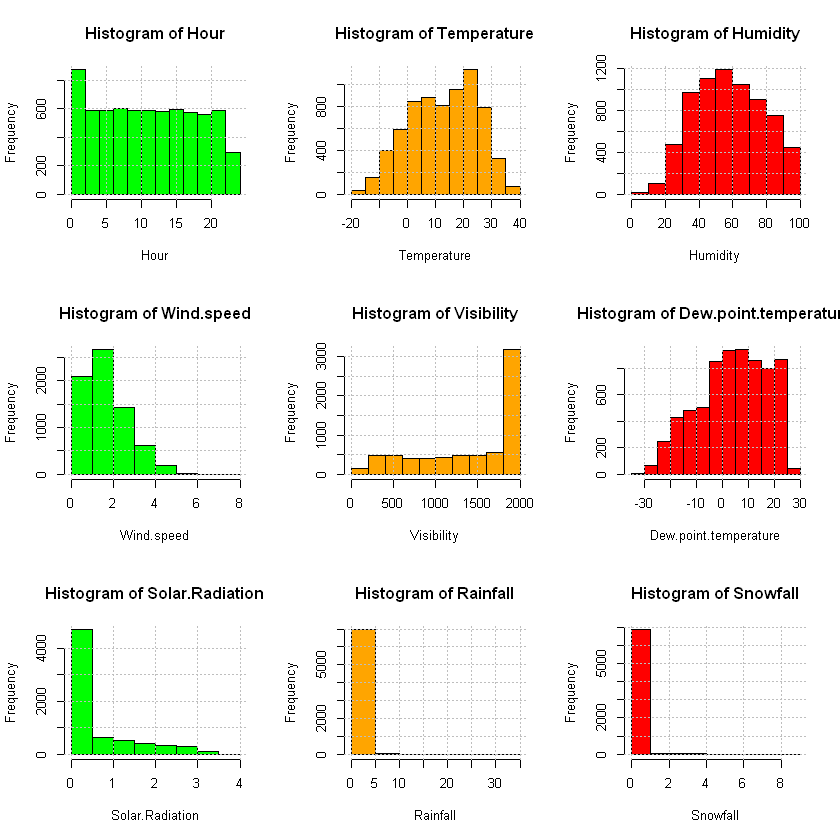

In [11]:
# Plotting histograms for every numeric variable
# Dividing our area into 3 rows and 3 columns 
par(mfrow = c(3,3), bg = "white")

hist(Hour, col = "green", breaks = 10)
grid(col = "gray")
hist(Temperature, col = "orange", breaks = 10)
grid(col = "gray")
hist(Humidity, col = "red", breaks = 10)
grid(col = "gray")

hist(Wind.speed, col = "green", breaks = 10 )
grid(col = "gray")
hist(Visibility, col = "orange", breaks = 10 )
grid(col = "gray")
hist(Dew.point.temperature, col = "red", breaks = 10 )
grid(col = "gray")

hist(Solar.Radiation, col = "green", breaks = 10 )
grid(col = "gray")
hist(Rainfall, col = "orange", breaks = 10 )
grid(col = "gray")
hist(Snowfall, col = "red", breaks = 10 )
grid(col = "gray")

**Analysis of IMPORTANT FINDINGS:**
* **Wind.speed :**
    * The histogram is right skewed.
    * This means that at really high wind speed, there are lesser chances of people travelling outside and using bikes!
* **Visibility :**
    * This histogram is keft skewed.
    * Thus, when the visibility is low, there will be lesser people outside and there are lesser chances of using bikes.
* **Hour :**
    * This histogram has **Uniform Modality**
    * The numbers are approximately the same through all hours of the day.
    * The numbers in the starting hour are slightly more and the numbers towards the end of the day drop down!
* **Rainfall and Snowfall:**
    * Here, we do not observe that points for high values of rainfall and snowfall.
    * Clearly, when it's raining or snowing a bit too much outside, people would prefer staying indoors and hence there would be lesser usage of the rented bike counts!
* **Temperature and Humidity:**
    * These histograms are almost symmetric.
    * This plot follows a Normal Distribution.
    * Thus, only in extreme weather conditions, people are less likely to step out and there would be lesser usage of the bikes.
   

### Investigate Pairs of Variables

#### Plot 3 : Scatterplot Matrix

* Here, we have plotted the variables using a scatterplot matrix to visualise the correlations between variables.
* Here, this plot represents relationships betweeen two variables at a time.
* They also show the presence of outliers.

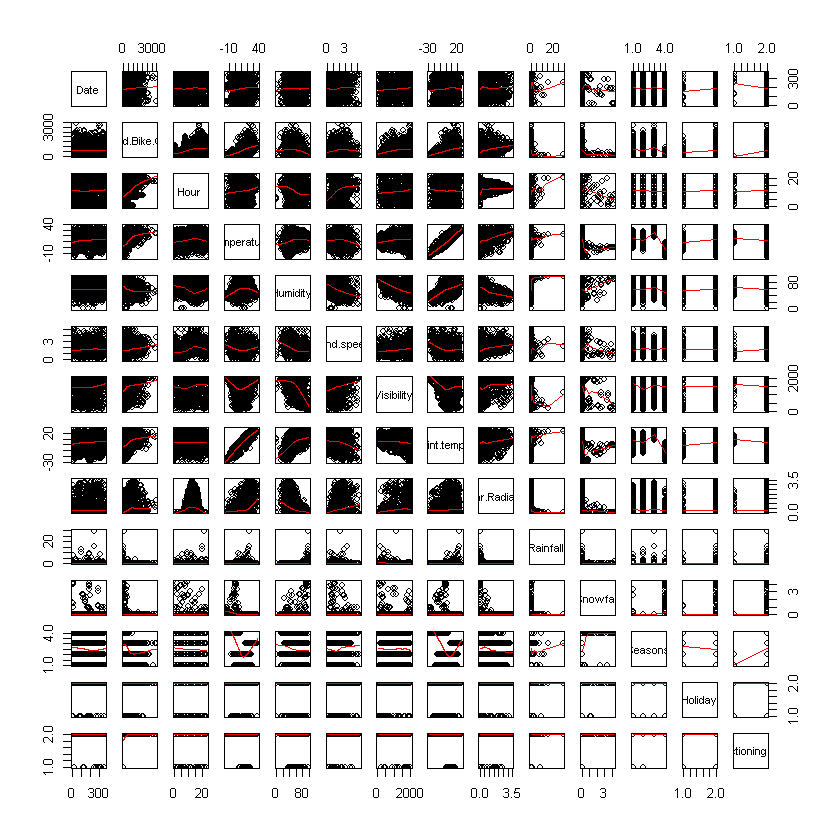

In [12]:
pairs(bike_data[sample.int(nrow(bike_data),1000),], panel = panel.smooth)

**Analysis of IMPORTANT FINDINGS:**

* Linear Relationships :
    * Temperature and Humidity.
    * Temperature and Dew.point.temperature

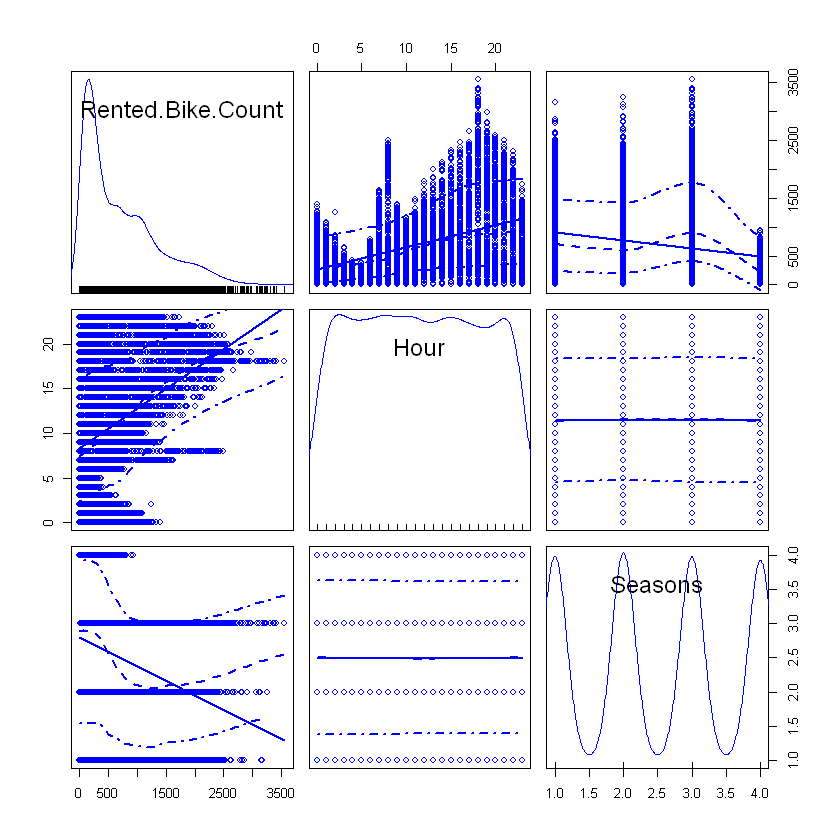

In [13]:
scatterplotMatrix(~Rented.Bike.Count+Hour+Seasons, data = bike_data)

#### Correlation Coefficients

* Here, we display the correlation coefficients for all pairs of variables.
* I have separated out the numeric data for easier analysis.

In [14]:
numeric_data = subset(bike_data, select = c("Rented.Bike.Count","Hour","Temperature","Humidity","Wind.speed","Visibility","Dew.point.temperature","Solar.Radiation","Rainfall","Snowfall"))

round(cor(numeric_data), digits = 2)

,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall
Rented.Bike.Count,1.00,0.41,0.54,-0.20,0.13,0.20,0.38,0.26,-0.12,-0.14
Hour,0.41,1.00,0.13,-0.24,0.29,0.11,0.01,0.15,0.01,-0.03
Temperature,0.54,0.13,1.00,0.16,-0.03,0.04,0.91,0.35,0.05,-0.22
Humidity,-0.20,-0.24,0.16,1.00,-0.34,-0.54,0.53,-0.47,0.23,0.12
Wind.speed,0.13,0.29,-0.03,-0.34,1.00,0.18,-0.18,0.33,-0.01,-0.02
Visibility,0.20,0.11,0.04,-0.54,0.18,1.00,-0.17,0.15,-0.16,-0.13
Dew.point.temperature,0.38,0.01,0.91,0.53,-0.18,-0.17,1.00,0.09,0.12,-0.15
Solar.Radiation,0.26,0.15,0.35,-0.47,0.33,0.15,0.09,1.00,-0.07,-0.07
Rainfall,-0.12,0.01,0.05,0.23,-0.01,-0.16,0.12,-0.07,1.00,0.01
Snowfall,-0.14,-0.03,-0.22,0.12,-0.02,-0.13,-0.15,-0.07,0.01,1.00


#### Correlation Matrix

* Here, we visualise the matrix.
* This matrix is useful for summarising our data.
* Here, each cell in our matrix shows correlation between two variables.

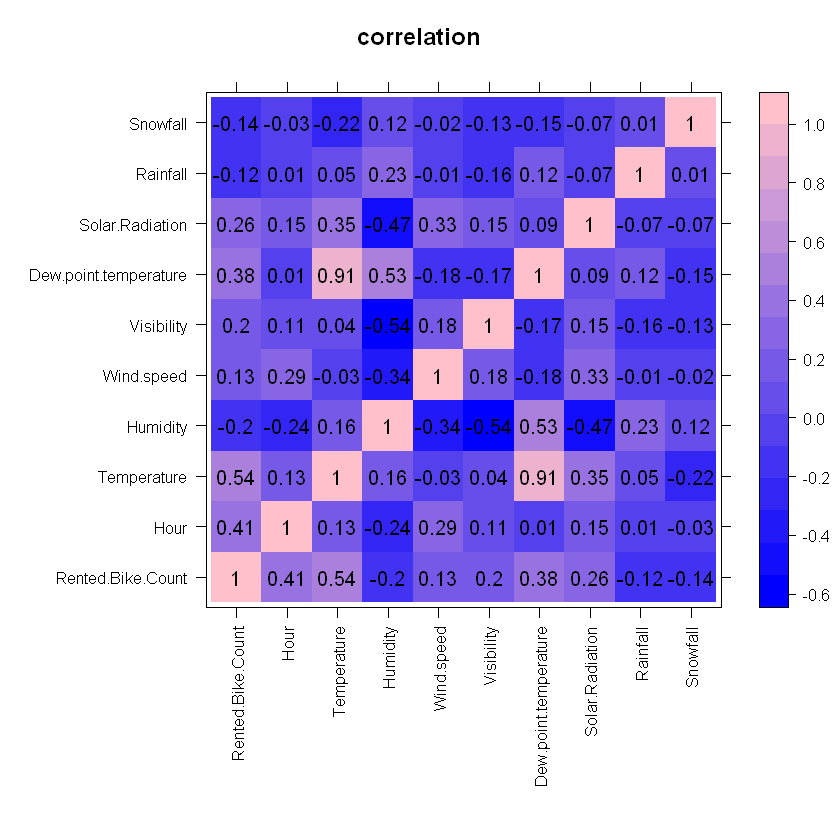

In [15]:
# Reference : FIT5149 Week 3 Tutorial

# Defining our panel 
myPanel <- function(x, y, z, ...) {
  panel.levelplot(x,y,z,...)
  panel.text(x, y, round(z, 2))
}
 
# Defining the color scheme
cols = colorRampPalette(c("blue","pink"))

# Plot the correlation matrix.
levelplot(cor(numeric_data), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

**Analysis of various values of coefficients:**
* **Positive Correlation** :
    * 0 to 0.5 : Weak
    * 0.5 to 0.8 : Moderate
    * 0.8 to 1.0 : Strong 
* **Negative Correlation** :
    * -0.5 to 0 : Weak
    * -0.8 to -0.5 : Moderate
    * -1.0 to -0.8 : Strong 
    
**Analysis of Important Findings:**
* Top **Positive Correlations**:
    * Rented.Bike.Count and Temperature
    * Rented.Bike.Count and Hour
    * Temperature and Dew.point.temperature.
    * Dew.point.temperature and Humidity
* Top **Negative Correlations**:
    * Humidity and Visibility
    * Humidity and Hour
    * Humidity and Solar.Radiation
* Since **Temperature** and **Dew.point.temperature** are correlated,
    * One of them can be removed.
* Variables which are **more correlated** with Rented.Bike.Count :
    * Hour : Weak Positive Correlation 
    * Temperature : Moderate Positive Correlation
    * Dew.point.tempearature : Weak Positive Correlation
    * Solar.Radiation : Weak Positive Correlation
    * Visibility : Weak Positive Correlation

* **INFERENCE TASK**:
    * Based on the above analysis, we can say that the attributes that contribute the most to our model's performance:
        * Hour
        * Temperature
        * Solar.Radiation
        * Visibility 
    * Since correlations between the predictor values is not desirable, we can remove one of the variables :
        * Example : We can remove Dew.point.temperature as it is highly correlated with Temperature.

## 4. Methodology<a class="anchor" id="sec_4"></a>

* Here, I have developed two models to accurately predict the number of bikes required.
    * Model 1 : Linear Regression Model
    * Model 2 : SVM : Support Vector Machine Model

* **Methodology Followed for the Development of the Linear Model** :
    * First I started with the most basic approach required to tackle the prediction. Hence, I started off with a linear model.
    * I took into consideration all the variables while predicting the target variable.
    * Then, I compared the accuracy of the models by checking the Adjusted R-squared values and p values.
    * I then sorted out the variables which had greater effects on our target variable.
    * I even plotted and analysed certain diagnostic plots for each model.
    * Thus, this linear model was further improved by removing certain predictor variables and showing various interactions between the variables.
    * The different interactions used were derived using the results of the correlation matrix and hit and trial methods!
        * Example :
            * Hour:Temperature:Visibility:Seasons:Functioning.Day
            * Relation between Hour:Temperature
                * How the usage of the rented bikes changes at different hoirs of the day according to temperature.
            * Relation between Temperature and Visibility
                * How to Visibility changes at various temperatures, and how this in turn affects the use of the rented bikes.
            *  Relation between Visibility, Seasons and Functioning.Day
                * How the various Seasons decide whether a given day is functional or nor, based on the visibility - and how this in turn affects tge usage of the rental bikes.
    * Some variables did not have an uniform distribution. In order to accomodate these predictions.
         * I have used sqrt() function on the target variable.
    * This model was then used to train the dataset and predict the values and the R Squared Value comes to around 0.73
    * Furthermore, I have even plotted the actual and predicted values using the Linear Regression Model to show the accuracy and variance!
    
* **Methodology Followed for the Development of the SVM Model** :    
    * The SVM model has been used in order to improve the accuracy of the findings.
    * Here, I have considered all the variables used for predicting the target variable.
    * After training the dataset and testing the dataset, the R Squared Value comes to around 0.77

## 5. Model Development <a class="anchor" id="sec_5"></a>

* This section revolves around how the two models were developed.
* A step by step procedure has also been provided.


**Model 1 : Linear Regression Model:**

**Model 2 : SVM : Support Vector Machine Model:**


### Model 1 : Building the Linear Regression Model

* Here, this is the basic model.
* We have considered all variables while determining the target variable.

### Preparing the Data Frame

* Here, we re-load the data frame and factorise the categorical variables.
* Categorical variables can take values which we cannot organise in a logical sequence.
Our categorical variables are : 
    * Seasons
    * Holiday
    * Functioning.Day

In [16]:
bike_data <- read.csv("train.csv")
#head(bike_data)

# 4 Seasons : Summer, Autumn, Spring, Winter
bike_data$Seasons <- as.factor(bike_data$Seasons)

# 2 : Holiday, No Holiday
bike_data$Holiday <- as.factor(bike_data$Holiday)

# 2 : Yes, No 
bike_data$Functioning.Day <- as.factor(bike_data$Functioning.Day)

# Viewing the structure of our training dataset
str(bike_data)

'data.frame':	7008 obs. of  14 variables:
 $ Date                 : Factor w/ 365 levels "1/1/18","1/10/18",..: 54 78 255 300 77 151 105 353 210 10 ...
 $ Rented.Bike.Count    : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour                 : int  14 14 5 9 17 10 8 1 20 18 ...
 $ Temperature          : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity             : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed           : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility           : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ Dew.point.temperature: num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ Solar.Radiation      : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...
 $ Holiday              : Factor w/ 2 levels "Holiday"

### Functions for Model Accuracy

* We will use these functions while building our model.
* We will use them in order to evaluate the accuracy of the model.

**Function to Calculate RMSE:**

* **Name** : Calculate_RMSE

* **Input parameters** : 
    * true : vector of true values
    * predicted : vector of predicted values

* **Return values** :
    * A data frame containing the RMSE Value

* **Description** :
    * Calculate the TSS and RSS as:
    * RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$
    * Residual standard error - $\sqrt{\frac{1}{df}RSS}$

In [17]:
# Function to calculate the RMSE 
calculate_RMSE <- function(true, predicted) {
    RSS <- sum((predicted - true)^2)
    
    # Computing the RMSE value 
    RMSE = sqrt(RSS/length(predicted))
    RMSE <- round(RMSE, digits = 2)
    
    # Returning the two values
    data.frame(
        RMSE = RMSE
    )
}

**Function to Calculate R Squared Value:**

* **Name** : Calculate_R_Squared

* **Input parameters** : 
    * true : vector of true values
    * predicted : vector of predicted values

* **Return values** :
    * A data frame containing the R Squared Values

* **Description** :
    * Calculate the TSS and RSS as:
    * RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$
    * TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
    * R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$

In [18]:
# Function to calculate the R-Squared value 
calculate_R_Squared <- function(true, predicted) {
    RSS <- sum((predicted - true)^2)
    TSS <- sum((true - mean(true))^2)
    
    # Computing the R Squared value
    R_Squared <- 1 - (RSS / TSS)
    R_Squared <- round(R_Squared, digits = 2)

    # Returning the two values
    data.frame(
        Rsquare = R_Squared
    )
}

### Model 1 : Fitting in all variables

* Here, we try fitting all variables to see what appears to be important.
* We see how the different variables are affecting the Rented.Bike.Count
* Here, we build the regression model with the lm() function.

In [19]:
fit1 <- lm(Rented.Bike.Count ~ ., data = bike_data)
summary(fit1)


Call:
lm(formula = Rented.Bike.Count ~ ., data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1182.18  -242.40   -39.18   195.10  1716.64 

Coefficients: (4 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.969e+02  2.338e+02  -2.125 0.033616 *  
Date1/10/18            1.514e+02  1.508e+02   1.004 0.315195    
Date1/11/18            3.084e+02  1.412e+02   2.185 0.028931 *  
Date1/12/17            2.504e+02  1.301e+02   1.925 0.054260 .  
Date1/2/18             8.516e+01  1.373e+02   0.620 0.535097    
Date1/3/18             1.297e+02  1.396e+02   0.929 0.352749    
Date1/4/18            -1.398e+02  1.423e+02  -0.982 0.326117    
Date1/5/18             4.697e+01  1.468e+02   0.320 0.748939    
Date1/6/18            -6.793e+01  1.497e+02  -0.454 0.650049    
Date1/7/18            -9.099e+02  1.542e+02  -5.900 3.81e-09 ***
Date1/8/18            -1.128e+03  1.653e+02  -6.828 9.36e-12 ***

**Analysis of Meaningful Interpretations:**

* Our **output** has the following:
    * residuals
    * coefficients
    * residual standard error
    * F-statistic
* These are useful to assess and test the accuracy of our generated model.

* **Adjusted R-squared ($R^2$)** : 
    * This value indicates that this particular model explains 66% of the variation in **Rented Bike Counts.**

* **F-statistic**:
    * This is really useful in determining whether there is a relationship between our predictor variable and response variables. 
    * In general, the further the F-statistic is from 1, the better!
    * This has a p-value < 2.2e-16 - Thus, we reject the null hypothesis. 
    * Null Hypothesis : the model explains nothing. 
    * Hence this implies, the model is useful. 
    
* **p-values:**
    * From the p values, we can see that :
        * The relationship between Rented.Bike.Count and Dew.point.temperature 
        * It is **NOT THAT SIGNIFICANT**

In [20]:
# Removing Dew.point.temperature

fit2 <- lm(Rented.Bike.Count ~ ., data = subset(bike_data, select=c(-Dew.point.temperature)))
summary(fit2)


Call:
lm(formula = Rented.Bike.Count ~ ., data = subset(bike_data, 
    select = c(-Dew.point.temperature)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1180.94  -242.38   -39.17   195.71  1717.54 

Coefficients: (4 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.521e+02  2.128e+02  -2.595 0.009487 ** 
Date1/10/18         1.605e+02  1.499e+02   1.070 0.284488    
Date1/11/18         3.133e+02  1.409e+02   2.224 0.026190 *  
Date1/12/17         2.493e+02  1.301e+02   1.917 0.055342 .  
Date1/2/18          8.410e+01  1.373e+02   0.613 0.540135    
Date1/3/18          1.309e+02  1.395e+02   0.938 0.348277    
Date1/4/18         -1.312e+02  1.415e+02  -0.927 0.354018    
Date1/5/18          5.778e+01  1.455e+02   0.397 0.691329    
Date1/6/18         -5.768e+01  1.486e+02  -0.388 0.697992    
Date1/7/18         -8.989e+02  1.530e+02  -5.876 4.42e-09 ***
Date1/8/18         -1.113e+03  1.629e+02  -6.830

**Interpretations:**

* Here, The Adjusted R-squared for the full model is 0.66.
* The Adjusted R-squared for the second model is 0.66.
* The two values are the same. 
* Thus, excluding the variable :
    * It has made the model simple.
    * Without significantly losing the modeling accuracy.

**Plot Function: plot()** 

* The plot function produces four diagnostic plots as shown below :

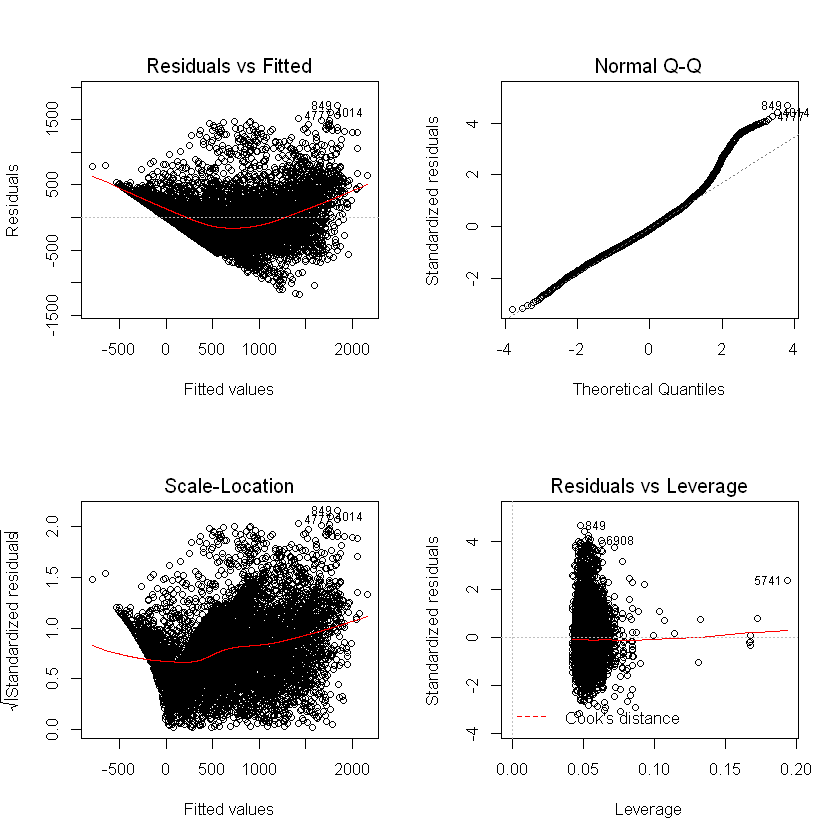

In [21]:
par(mfrow = c(2,2))
plot(fit1) 

**Interpretations:**

The diagnostic plots show residuals in four different ways.

1. **Residual vs fitted plot**: 
    * This plot is used to check if residuals have linear or non-linear patterns.
    * Linear Relationships : If there are equally spread residuals around a horizontal line without distinct patterns. 
    * Non Linear Relationships: If the relationship between predictors and an response variable is non-linear, an obvious pattern could show up in this plot.
    * Here : There could be a non-linear relationship between Rented.Bike.Count and all the predictors, as the residuals are not scattered evenly.
    
* **Normal Q-Q (quantile-quantile plot) plot**: 
   * The normal Q-Q plot tells us if residuals are normally distributed.  
   * If the residuals are properly alined on the dashed straight line, it is a good sign!
   * Here : The residuals seem to be normally distributed. 
   
* **Scale-location plot**: 
    * This plot is used to check the assumption of equal variance.
    * This is done by displaying if the  residuals are spread equally along the ranges of predictors. 
    * Here : The residuals seem to be equally randomly spread around the horizontal line.

* **Residual-leverage plot**: 
    * This plot helps us identify influential data samples. 
    * In the residual-leverage plot, we look for outlying values at the upper right corner or at the lower right corner. 
    * Samples located in those places can be influential against a regression line. 
    * Here : We have outliers such as 5741.
    * There are possible influential outliers.

In [22]:
summary(update(fit1, . ~ . + Temperature:Dew.point.temperature))


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Dew.point.temperature + 
    Solar.Radiation + Rainfall + Snowfall + Seasons + Holiday + 
    Functioning.Day + Temperature:Dew.point.temperature, data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1201.10  -232.51   -27.51   181.30  1681.20 

Coefficients: (4 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -8.729e+02  2.326e+02  -3.752 0.000177 ***
Date1/10/18                        2.727e+02  1.491e+02   1.829 0.067441 .  
Date1/11/18                        4.897e+02  1.400e+02   3.497 0.000474 ***
Date1/12/17                        2.152e+02  1.285e+02   1.676 0.093881 .  
Date1/2/18                         2.819e+01  1.356e+02   0.208 0.835350    
Date1/3/18                         2.482e+02  1.381e+02   1.798 0.072243 .  
Date1/4/18                

**Interpretations:**
* Here, this has slightly increased the value of Adjusted R-Squared to 0.6682

* From the p-values, 
    * The following variables have really low p value
    * This means that we can reject the Null Hypothesis
    * we can see that the following variables have significant contribution to our target :
        * Hour
        * Temperature
        * Visibility
        * Dew.point.temperature
        * Solar.Radiation
        * Snowfall
        * Rainfall
        * Functioning.Day

**Update : Fitting a smaller model**
* This model only uses predictors for which there is some evidence associated with the outcome.


In [23]:
fit3 = lm(Rented.Bike.Count ~ Hour + Temperature + Visibility + Solar.Radiation + Snowfall + Rainfall + Functioning.Day, data = bike_data)
summary(fit3)


Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature + Visibility + 
    Solar.Radiation + Snowfall + Rainfall + Functioning.Day, 
    data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1325.43  -283.69   -44.22   210.64  2320.74 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.001e+03  3.416e+01 -29.313   <2e-16 ***
Hour                3.097e+01  8.025e-01  38.594   <2e-16 ***
Temperature         2.731e+01  5.016e-01  54.441   <2e-16 ***
Visibility          1.378e-01  9.250e-03  14.900   <2e-16 ***
Solar.Radiation     7.216e+00  6.788e+00   1.063    0.288    
Snowfall           -1.485e+01  1.268e+01  -1.171    0.242    
Rainfall           -7.090e+01  4.746e+00 -14.938   <2e-16 ***
Functioning.DayYes  8.375e+02  3.003e+01  27.892   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 455.2 on 7000 degrees of freedom
Multiple R-squared:  0.5038,	Adjusted 

**Comparing fit 1 and fit 2 and fit 3:**
* Here, the Adjusted R-Squared value has decreased. 
* There is not much difference between the two.
* Hence, I have gone ahead with the basic simple model.
* Also, a model with lesser number of predictors is preferable.
* Thus, we **can remove the predictor : Dew.point.temperature!**

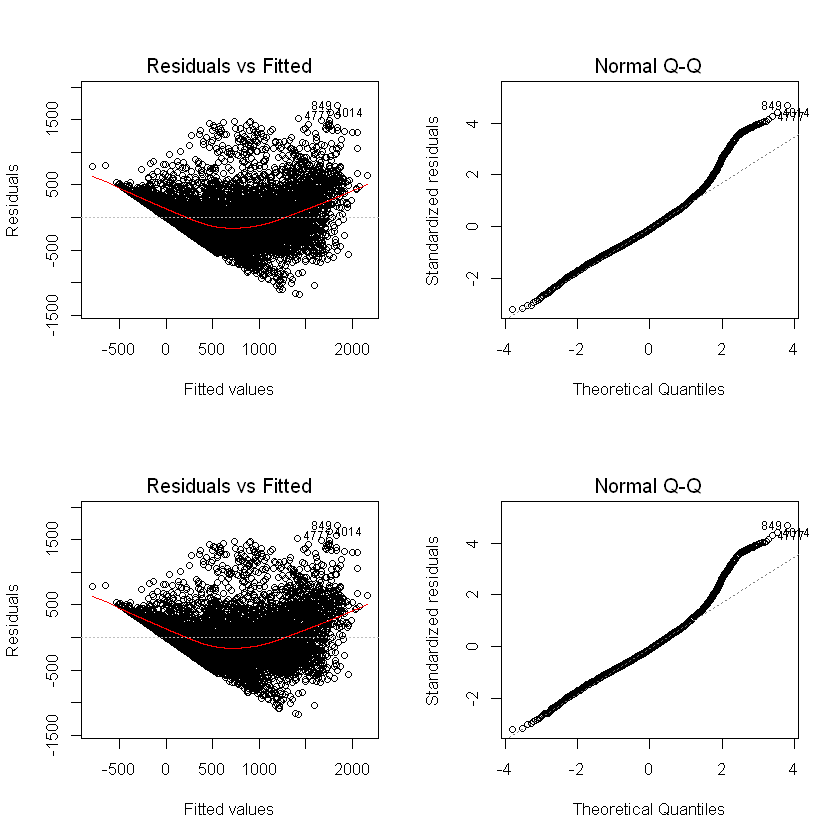

In [24]:
# Comparing the diagnostic plots
par(mfcol=c(2,2))

plot(fit1, which = 1)
plot(fit2, which = 1)

plot(fit1, which = 2)
plot(fit2, which = 2)

* Thus, we can see that removing the Dew.point.temperature does not make that much of a difference!

**Update : Step() function**
* Here, we select the best variables by using the step function!
* Here, I am performing the step functions on the fit1 model - where I had considered all my variables.

In [25]:
step1 <- step(fit1)
summary(step1)

Start:  AIC=83505.75
Rented.Bike.Count ~ Date + Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall + Seasons + Holiday + Functioning.Day


Step:  AIC=83505.75
Rented.Bike.Count ~ Date + Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall + Seasons + Functioning.Day


Step:  AIC=83505.75
Rented.Bike.Count ~ Date + Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day

                         Df Sum of Sq        RSS   AIC
- Dew.point.temperature   1     45975  942089752 83504
<none>                                 942043777 83506
- Functioning.Day         1   1296865  943340642 83513
- Wind.speed              1   1742824  943786601 83517
- Humidity                1   3403510  945447287 83529
- Snowfall                1   3501874  945545651 


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day, data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1180.94  -242.38   -39.17   195.71  1717.54 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.521e+02  2.128e+02  -2.595 0.009487 ** 
Date1/10/18         1.605e+02  1.499e+02   1.070 0.284488    
Date1/11/18         3.133e+02  1.409e+02   2.224 0.026190 *  
Date1/12/17         2.493e+02  1.301e+02   1.917 0.055342 .  
Date1/2/18          8.410e+01  1.373e+02   0.613 0.540135    
Date1/3/18          1.309e+02  1.395e+02   0.938 0.348277    
Date1/4/18         -1.312e+02  1.415e+02  -0.927 0.354018    
Date1/5/18          5.778e+01  1.455e+02   0.397 0.691329    
Date1/6/18         -5.768e+01  1.486e+02  -0.388 0.697992    
Date1/7/18         -8.989e+02  1.530e+02  -5.876 4.42e-09 ***
Date1/8/1

**Interpretation:**
* Thus, the best model has the following predictors:
    - Functioning.Day   
    - Wind.speed       
    - Snowfall          
    - Rainfall          
    - Visibility        
    - Humidity          
    - Solar.Radiation     
    - Temperature         
    - Hour               
    - Date    

#### Analysing the interaction between the various models

**Using anova() function in order to compare the two models:**
* Here, all terms of the smaller model appear in the larger model.
* In the following steps, I have analysed the interactions between the different variables in order to improve the accuracy of our model by improving the R Squared Value.

**Interaction 1 : Temperature and Dew.point.temperature**
* Here, I have considered this because of the high level of correlation between the two from the correlation matrix.
* We can see that the R value has slightly increased.

In [26]:
fit4 = update(step1, . ~ . + Temperature:Dew.point.temperature)
summary(fit4)
#0.6675


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day + Temperature:Dew.point.temperature, 
    data = bike_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1207.0  -234.1   -28.5   182.5  1679.0 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -4.858e+02  2.104e+02  -2.309 0.020949 *  
Date1/10/18                        2.035e+02  1.482e+02   1.373 0.169840    
Date1/11/18                        4.407e+02  1.396e+02   3.156 0.001605 ** 
Date1/12/17                        2.261e+02  1.286e+02   1.758 0.078725 .  
Date1/2/18                         4.055e+01  1.357e+02   0.299 0.765129    
Date1/3/18                         2.290e+02  1.381e+02   1.658 0.097425 .  
Date1/4/18                        -1.403e+02  1.399e+02  -1.003 0.315738    
Date1/5/18                        -1.132e+02

**Interaction 2 : Hour:Temperature**
* Here, we see how the temperature changes over different hours affecs the Rented Bike Count.
* This has also slightly increased our R value.

In [27]:
fit6 = update(step1, . ~ . + Hour:Temperature)
summary(fit6)
#0.6962


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day + Hour:Temperature, data = bike_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1300.8  -201.0   -29.8   157.1  1616.3 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.087e+02  2.014e+02  -1.037 0.299967    
Date1/10/18         2.802e+02  1.417e+02   1.978 0.048002 *  
Date1/11/18         3.716e+02  1.331e+02   2.792 0.005258 ** 
Date1/12/17         2.610e+02  1.229e+02   2.124 0.033720 *  
Date1/2/18          1.344e+02  1.297e+02   1.036 0.300033    
Date1/3/18          2.320e+02  1.319e+02   1.759 0.078614 .  
Date1/4/18         -5.868e+01  1.337e+02  -0.439 0.660824    
Date1/5/18          1.500e+02  1.375e+02   1.091 0.275457    
Date1/6/18          4.502e+01  1.405e+02   0.320 0.748607    
Date1/7/18         -7.491e+02  1.446e+02  -5.180 2.29e-07 ***


**Interaction 3 : Hour - Temperature and Seasons**

* We further see how this change in temperature occurs in various seasons.
* This also increases the Adjusted R Square Value.

In [28]:
fit9 = update(step1, . ~ . + Hour:Temperature:Seasons)
summary(fit9)
#0.7021


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day + Hour:Temperature:Seasons, data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1280.12  -193.55   -28.87   147.51  1633.12 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1.350e+02  1.998e+02  -0.676 0.499244    
Date1/10/18                     2.291e+02  1.414e+02   1.620 0.105193    
Date1/11/18                     3.502e+02  1.321e+02   2.650 0.008057 ** 
Date1/12/17                     2.667e+02  1.217e+02   2.192 0.028445 *  
Date1/2/18                      1.228e+02  1.284e+02   0.956 0.339089    
Date1/3/18                      2.602e+02  1.306e+02   1.992 0.046379 *  
Date1/4/18                     -1.750e+02  1.329e+02  -1.316 0.188171    
Date1/5/18                     -8.791e+00  1.371e+02  -0.064 0.948867   

In [29]:
fit10 = update(step1, . ~ . + Hour:Temperature:Seasons:Functioning.Day)
summary(fit10)
#0.7135


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day + Hour:Temperature:Functioning.Day:Seasons, 
    data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1388.65  -182.77   -27.08   132.64  1633.01 

Coefficients: (2 not defined because of singularities)
                                                    Estimate Std. Error t value
(Intercept)                                        1.389e+02  1.966e+02   0.706
Date1/10/18                                        1.623e+02  1.388e+02   1.170
Date1/11/18                                        3.181e+02  1.296e+02   2.455
Date1/12/17                                        2.669e+02  1.193e+02   2.237
Date1/2/18                                         1.217e+02  1.259e+02   0.966
Date1/3/18                                         2.566e+02  1.281e+02   2.003
Date1/4/18                                

In [30]:
fit11 = update(step1, . ~ . + Hour:Temperature:Visibility:Seasons:Functioning.Day)
summary(fit11)
#0.7151


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day + Hour:Temperature:Visibility:Functioning.Day:Seasons, 
    data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1447.14  -177.34   -25.58   125.65  1679.81 

Coefficients: (2 not defined because of singularities)
                                                               Estimate
(Intercept)                                                   3.394e+02
Date1/10/18                                                   2.336e+02
Date1/11/18                                                   3.650e+02
Date1/12/17                                                   2.604e+02
Date1/2/18                                                    1.382e+02
Date1/3/18                                                    1.304e+02
Date1/4/18                                                   -3.173e+01
Date1/5/18     

In [31]:
fit12 = update(step1, . ~ . + Hour:Temperature:Visibility:Seasons:Functioning.Day:Holiday)
summary(fit12)
#0.7157
anova(fit1, fit12)


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day + Hour:Temperature:Visibility:Functioning.Day:Seasons:Holiday, 
    data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1449.55  -176.30   -25.14   124.14  1678.75 

Coefficients: (5 not defined because of singularities)
                                                                                 Estimate
(Intercept)                                                                     3.467e+02
Date1/10/18                                                                     2.393e+02
Date1/11/18                                                                     3.703e+02
Date1/12/17                                                                     2.632e+02
Date1/2/18                                                                      1.408e+02
Date1/3/18                                 

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6633,942043777,NA,NA,NA,NA
2,6623,785455711,10,156588066,132.0358,1.398622e-252


**Interactions Summary:**
* Thus, with every variable interaction, we can see that the Adjusted Square Value has increased!
* Thus, our model accuracy has gradually increased.

### Using the Model to Predict Prices

In [32]:
# Splitting features and target variables

train_target <- bike_data[,c("Rented.Bike.Count")]
train_features <- bike_data[,c("Hour","Temperature","Humidity","Wind.speed","Visibility","Dew.point.temperature","Solar.Radiation","Seasons","Rainfall","Snowfall","Holiday","Functioning.Day")]

test_target <- bike_data_test[,c("Rented.Bike.Count")]
test_features <- bike_data_test[,c("Hour","Temperature","Humidity","Wind.speed","Visibility","Dew.point.temperature","Solar.Radiation","Seasons","Rainfall","Snowfall","Holiday","Functioning.Day")]

#### Predict the Rented Bike Count for the Testing Dataset

**Linear Model 1 :**
* Here, all variables have been used to predict the target variable.
* The target variable is kept as it is while developing the model.

In [33]:
# Developing our Linear Model
model_1<- lm(Rented.Bike.Count~. +
                   Hour:Temperature:Visibility:Seasons:Functioning.Day:Holiday, data = bike_data)
summary(model_1)
#R-Squared : 0.716 


Call:
lm(formula = Rented.Bike.Count ~ . + Hour:Temperature:Visibility:Seasons:Functioning.Day:Holiday, 
    data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1452.29  -175.41   -25.33   123.98  1675.82 

Coefficients: (9 not defined because of singularities)
                                                                                 Estimate
(Intercept)                                                                     5.957e+02
Date1/10/18                                                                     2.013e+02
Date1/11/18                                                                     3.486e+02
Date1/12/17                                                                     2.660e+02
Date1/2/18                                                                      1.432e+02
Date1/3/18                                                                      1.441e+02
Date1/4/18                                                                     -6.

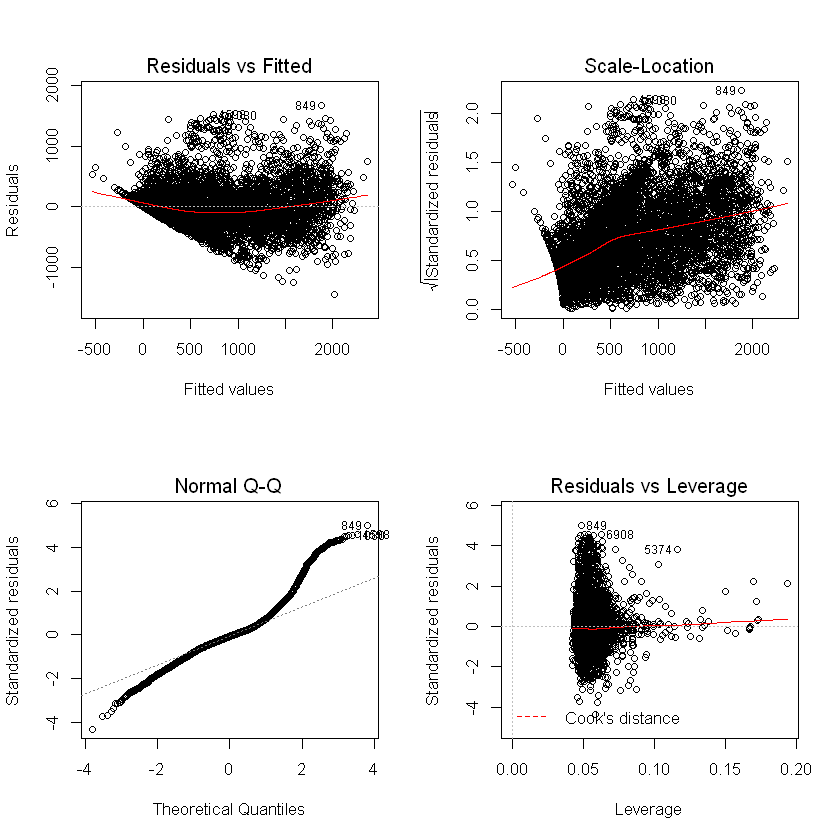

In [34]:
# Visualising our linear model 1
par(mfcol = c(2,2))
plot(model_1)

In [35]:
# Predictions with model 1 for the training dataset
model_1_train_prediction <- predict(model_1, newdata = bike_data)

cat(" \n Model Accuracy for training dataset:")
# Evaluating the Model Accuracy for training dataset
calculate_RMSE(test_target, model_1_train_prediction)
calculate_R_Squared(test_target, model_1_train_prediction)

Warning message in predict.lm(model_1, newdata = bike_data):
"prediction from a rank-deficient fit may be misleading"


 
 Model Accuracy for training dataset:

RMSE
<dbl>
846.38


Rsquare
<dbl>
-5.96


In [36]:
# Predictions with model 1 for the testing dataset
model_1_test_prediction <- predict(model_1, newdata = bike_data_test)

cat(" \n Model Accuracy for testing dataset:")
# Evaluating the Model Accuracy for testing dataset
calculate_RMSE(test_target, model_1_test_prediction)
calculate_R_Squared(test_target, model_1_test_prediction)

Warning message in predict.lm(model_1, newdata = bike_data_test):
"prediction from a rank-deficient fit may be misleading"


 
 Model Accuracy for testing dataset:

RMSE
<dbl>
345.44


Rsquare
<dbl>
0.71


**Analysing the Accuracy of the Model :**
* Here, the high value of RSquared indicates high accuracy of the model!
* We started with an RSquared Value of 0.66 and now the value of 0.73

**Linear Model 2:**
* Here, certain interactions between the predictor variables have been taken into consideration.
* Also, we have considered the sqrt() of the target variable while developing the model.
* Usage of sqrt()
    * In order to solve the problem of heteroskedasticity.

In [37]:
# Updating our Linear Model 
model_2 <- lm(sqrt(Rented.Bike.Count)~. +
                   Hour:Temperature:Visibility:Seasons:Functioning.Day:Holiday, data = bike_data)
summary(model_2)
#R-Squared : 0.7704


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ . + Hour:Temperature:Visibility:Seasons:Functioning.Day:Holiday, 
    data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0546  -3.4301  -0.3248   2.9714  25.6777 

Coefficients: (9 not defined because of singularities)
                                                                                 Estimate
(Intercept)                                                                     1.025e+01
Date1/10/18                                                                     7.073e+00
Date1/11/18                                                                     1.015e+01
Date1/12/17                                                                     7.097e+00
Date1/2/18                                                                      3.529e+00
Date1/3/18                                                                      3.665e+00
Date1/4/18                                                                  

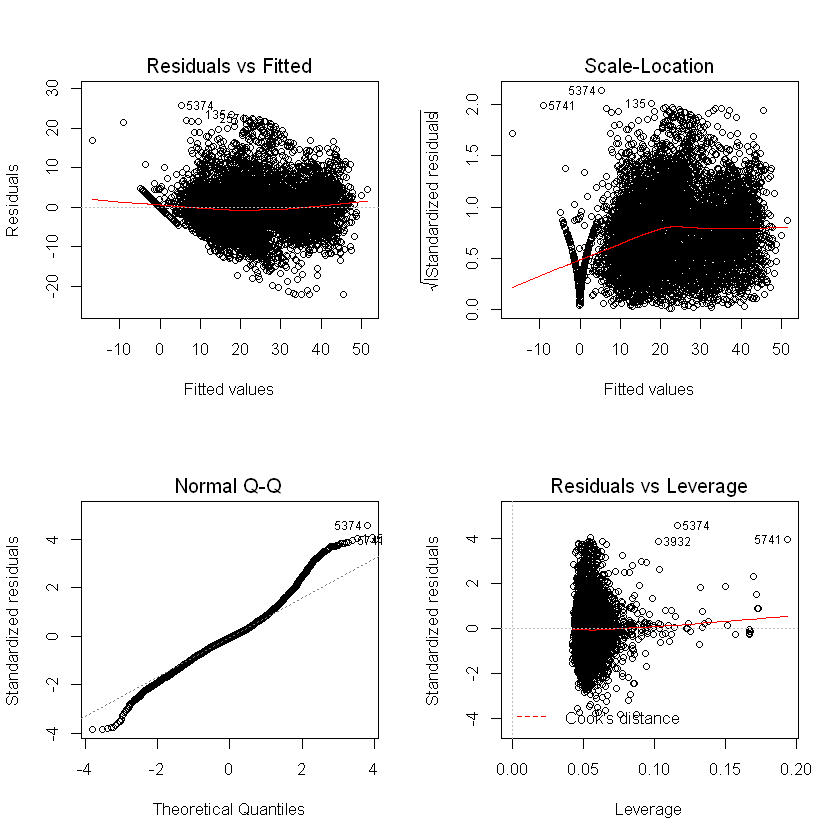

In [38]:
# Visualising our Linear Model 2
par(mfcol = c(2,2))
plot(model_2)

In [39]:
# Predictions with model 2 for the training dataset
model_2_train_prediction <- predict(model_2, newdata = bike_data)

# Evaluating the Model Accuracy 
calculate_RMSE(test_target, model_2_train_prediction^2)
calculate_R_Squared(test_target, model_2_train_prediction^2)

Warning message in predict.lm(model_2, newdata = bike_data):
"prediction from a rank-deficient fit may be misleading"


RMSE
<dbl>
840.39


Rsquare
<dbl>
-5.87


In [40]:
# Predictions with model 2 for the testing dataset
model_2_test_prediction <- predict(model_2, newdata = bike_data_test)

# Evaluating the Model Accuracy 
calculate_RMSE(test_target, model_2_test_prediction^2)
calculate_R_Squared(test_target, model_2_test_prediction^2)

Warning message in predict.lm(model_2, newdata = bike_data_test):
"prediction from a rank-deficient fit may be misleading"


RMSE
<dbl>
333.83


Rsquare
<dbl>
0.73


**Linear Model 3 : Adding some more interactions**

In [41]:
# Updating our Linear Model by adding some more variable interactions 
model_3 <- lm(sqrt(Rented.Bike.Count)~. +
                   Hour:wday(Date, label = TRUE): Humidity +
                   Hour:Solar.Radiation:Temperature:month(Date, label = TRUE) +
                   Hour:Dew.point.temperature:Solar.Radiation +
                   sqrt(Visibility):month(Date, label = TRUE):Temperature - Visibility +
                   Humidity:Temperature +
                   Humidity:Rainfall +
                   Humidity:Solar.Radiation +
                   Holiday:wday(Date, label = TRUE):Temperature +
                   Seasons:Solar.Radiation +
                   Date:Seasons +
                   Functioning.Day:wday(Date, label = TRUE), data = bike_data)
summary(model_3)
#R-Squared : 0.7831

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."



Call:
lm(formula = sqrt(Rented.Bike.Count) ~ . + Hour:wday(Date, label = TRUE):Humidity + 
    Hour:Solar.Radiation:Temperature:month(Date, label = TRUE) + 
    Hour:Dew.point.temperature:Solar.Radiation + sqrt(Visibility):month(Date, 
    label = TRUE):Temperature - Visibility + Humidity:Temperature + 
    Humidity:Rainfall + Humidity:Solar.Radiation + Holiday:wday(Date, 
    label = TRUE):Temperature + Seasons:Solar.Radiation + Date:Seasons + 
    Functioning.Day:wday(Date, label = TRUE), data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.3956  -3.4351  -0.4288   2.9905  21.9782 

Coefficients: (1109 not defined because of singularities)
                                                                Estimate
(Intercept)                                                   -4.551e+00
Date1/10/18                                                    7.464e-01
Date1/11/18                                                    1.107e+01
Date1/12/17                   

In [42]:
# Predictions with model 2 for the training dataset
model_3_train_prediction <- predict(model_3, newdata = bike_data)

# Evaluating the Model Accuracy 
calculate_RMSE(test_target, model_3_train_prediction^2)
calculate_R_Squared(test_target, model_3_train_prediction^2)

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message in predict.lm(model_3, newdata = bike_data):
"prediction from a rank-deficient fit may be misleading"


RMSE
<dbl>
838.92


Rsquare
<dbl>
-5.84


In [43]:
# Predictions with model 2 for the testing dataset
model_3_test_prediction <- predict(model_3, newdata = bike_data_test)

# Evaluating the Model Accuracy 
calculate_RMSE(test_target, model_3_test_prediction^2)
calculate_R_Squared(test_target, model_3_test_prediction^2)

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message in predict.lm(model_3, newdata = bike_data_test):
"prediction from a rank-deficient fit may be misleading"


RMSE
<dbl>
320.3


Rsquare
<dbl>
0.75


**Analysing the Accuracy of the Model :**
* Here, the high value of RSquared indicates high accuracy of the model!
* We started with an RSquared Value of 0.66 and now the value of 0.75!

### Model 2 : SVM Model

* These are Support-Vector Machines Models.
* They are supervised learning models.
* They can efficiently perform linear and non linear classification.
* This model clusters data into groups and then mapping of this data to tho new groups which have been formed.

* **SVM Model 1 :**
    * Here, we are first considering all our variables for predictions.
    

In [44]:
# Developing our SVM Model 1 
# Here, our type would be that of eps-regression
svm_model <- svm(Rented.Bike.Count~Hour + Temperature + Humidity + Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + Snowfall + Seasons + Holiday + Functioning.Day, data = bike_data, type = "eps-regression")
#summary(svm_model)

In [45]:
# Predictions with SVM model 1 for the training dataset
svm_model_train_prediction <- predict(svm_model, newdata = bike_data)

# Evaluating the Model Accuracy 
calculate_RMSE(test_target, svm_model_train_prediction)
calculate_R_Squared(test_target, svm_model_train_prediction)

RMSE
<dbl>
842.71


Rsquare
<dbl>
-5.9


In [46]:
# Predictions with SVM model 1 for the testing dataset
svm_model_test_prediction <- predict(svm_model, newdata = bike_data_test)

# Evaluating the Model Accuracy 
calculate_RMSE(test_target, svm_model_test_prediction)
calculate_R_Squared(test_target, svm_model_test_prediction)

RMSE
<dbl>
310.83


Rsquare
<dbl>
0.77


**Analysis:**
* We can clearly see that our R Squared Value has significantly increased to 0.77!

## 6. Results and discussion <a class="anchor" id="sec_6"></a>

* Here, we will be **COMPARING** the two models.

**Plot 1 : Plotting the actual and predicted values using the SVM Model**

Warning message in plot.window(...):
""width" is not a graphical parameter"
Warning message in plot.window(...):
""height" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""width" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""height" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""width" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""height" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""width" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""height" is not a graphical parameter"
Warning message in box(...):
""width" is not a graphical parameter"
Warning message in box(...):
""height" is not a graphical parameter"
Warning message in title(...):
""width" is not a graphical parameter"
Warning message in title(...):
""height" 

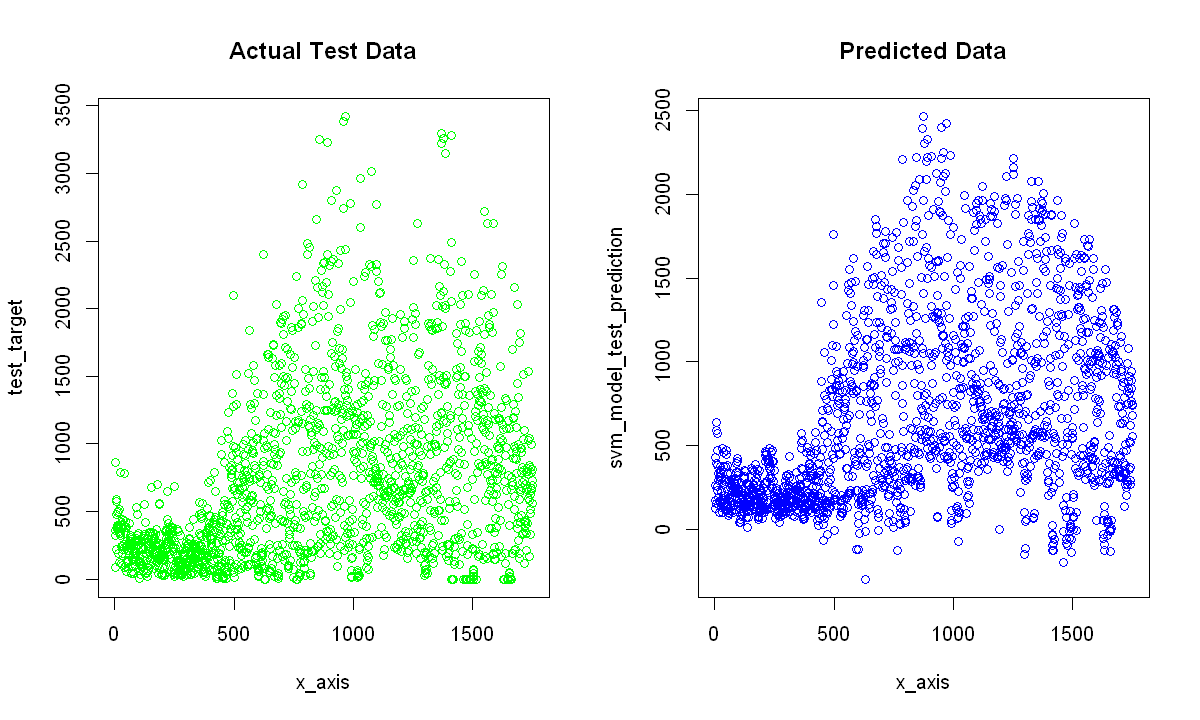

In [47]:
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width = width_choice, repr.plot.height=height_choice)
        }

# For the SVM Model : Plotting the actual values vs the predicted vales 
par(mfcol = c(1,2))

x_axis <- c(1:length(svm_model_test_prediction))

set_plot_dimensions(10, 6)
plot(x_axis, test_target, col = "green", width = 5, height = 10)
title('Actual Test Data')

set_plot_dimensions(10, 6)
plot(x_axis, svm_model_test_prediction, col = "blue")
title('Predicted Data')

**Plot 2 : Plotting the actual and predicted values using the Linear Regression Model**

* Here, I have considered the final linear model developed.

Warning message in plot.window(...):
""width" is not a graphical parameter"
Warning message in plot.window(...):
""height" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""width" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""height" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""width" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""height" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""width" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""height" is not a graphical parameter"
Warning message in box(...):
""width" is not a graphical parameter"
Warning message in box(...):
""height" is not a graphical parameter"
Warning message in title(...):
""width" is not a graphical parameter"
Warning message in title(...):
""height" 

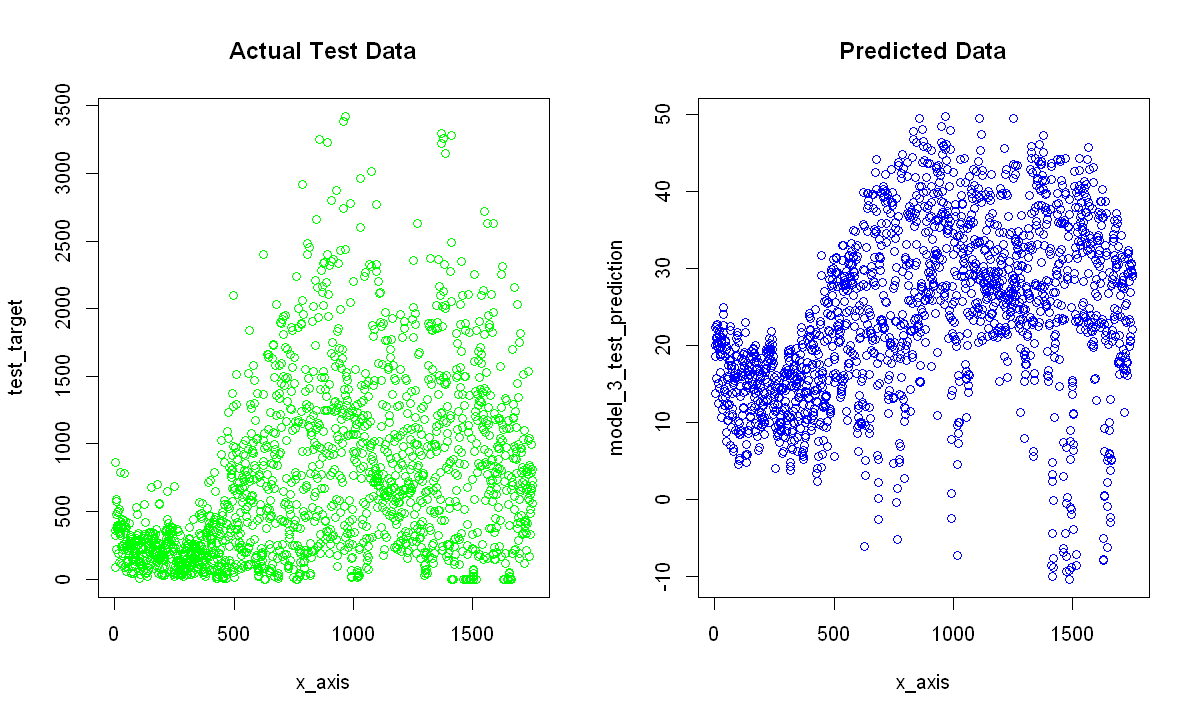

In [48]:
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

# For the SVM Model : Plotting the actual values vs the predicted vales 
par(mfcol = c(1,2))

x_axis <- c(1:length(model_3_test_prediction))

set_plot_dimensions(10, 6)
plot(x_axis, test_target, col = "green", width = 5, height = 10)
title('Actual Test Data')

set_plot_dimensions(10, 6)
plot(x_axis, model_3_test_prediction, col = "blue")
title('Predicted Data')

**Analysis from the two plots:**
* Thus, we can see that the predictions made by the SVM are more accurate than the predictions made by the linear model.
* **Correlation between the predictor variables:**
    * In general, greater correlation between the target and predictor variables is a good sign and correlation between the different predictor variables is a bad sign.
    * Here, from the correlation matrix, we can see that there is a significant amount of correlation between the variables.
    * This affects the accuracy while predicting the Rented.Bike.Count.
* **Non-Linear Relationships between the target and predictor variables:**
    * In order to accomodate these relationships, we have used sqrt() transformations and have used an SVM model.
* **Advantages of the Linear Regression Model:**
    * Simple approach
    * Easy to read, understand and interpret
* **Dis-advantages of the Linear Regression Model:**
    * It assumes a linear relationship between the variables
    * This does not take into consideration the non linear aspects
    * Over-simplifies the problem  
* **Advantages of the SVM Model:**
    * It takes into consideration the Non-Linear aspects
    * This is comparatively memory efficient   
    

## 7. Conclusion<a class="anchor" id="sec_7"></a>

* Thus, we have successfully performed significant data exploration, model development and testing. 
* **In Data Exploration and Exploratory Data Analysis:**
    * We have removed certain variables like Dew.point.temperature from the analysis, because of the high correlation found with Temperature. 
    * We have even analysed that certain variables like Hour, Temperature, Solar.Radiation contribute a lot more than the other variables while predicting the Rented.Bike.Count
* **In Model Development and Testing:**
    * We have been able to understand the steps taken to develop a linear regression and a SVM Model. 
    * We have handled and accomodated the Non-Linear relationships as well.
    * We have successfully trained our datasets in order to make right predictions.
    * Finally, we have been able to able to measure the accuracy of our models developed!

## 8. References <a class="anchor" id="sec_8"></a>

* https://en.wikipedia.org/wiki/Support_vector_machine
* https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/
* https://statistics.laerd.com/statistical-guides/understanding-histograms.php
* https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
* https://www.displayr.com/what-is-a-correlation-matrix/
* https://statisticsbyjim.com/regression/interpret-r-squared-regression/